## **Importing libraries and dataset**

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV  


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
data = pd.read_csv('/content/drive/MyDrive/Ml_project_dataset/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## **Data Cleaning**

In [73]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [74]:
data.shape

(381109, 12)

In [75]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [76]:
data=data.dropna()

In [77]:
data.duplicated().sum()

0

In [78]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [79]:
data.drop(['id'], axis=1 ,inplace=True)

### **Getting Dummies**

In [85]:
v_age = pd.get_dummies(data.Vehicle_Age, prefix_sep='_')
v_damage = pd.get_dummies(data.Vehicle_Damage, prefix_sep='_')
gender = pd.get_dummies(data.Gender, prefix_sep='_')

In [86]:
print(v_age.head())
print(v_damage.head())
print(gender.head())

   1-2 Year  < 1 Year  > 2 Years
0         0         0          1
1         1         0          0
2         0         0          1
3         0         1          0
4         0         1          0
   No  Yes
0   0    1
1   1    0
2   0    1
3   1    0
4   1    0
   Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       1     0


In [88]:
data['1-2 Year'] = v_age['1-2 Year']
data['< 1 Year'] = v_age['< 1 Year']
data['> 2 Years'] = v_age['> 2 Years']
data['damage_yes'] = v_damage['Yes']
data['damage_no'] = v_damage['No']
data['gender_F'] = gender['Female']
data['gender_M'] = gender['Male']

### **Observations for the age of vehicle:**

1. Half of the customers have the vehicle with age 1-2 years.
2. The proportion of customers with a vehicle age of more than 2 years are
very less.
3. Out of the customers with vehicle age of more than 2 years, those buying
the insurance are considerable proportionally.
4. Out of the customers with vehicle age of less than 1 year, those buying the
insurance are less proportionally.

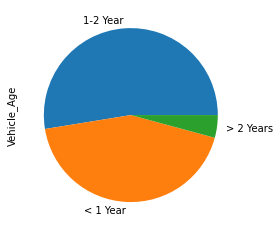

In [83]:
data['Vehicle_Age'].value_counts().plot(kind='pie')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


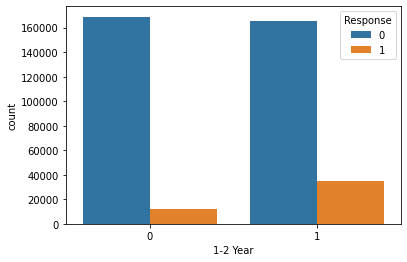

In [89]:
sns.countplot(data['1-2 Year'],hue = data['Response'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


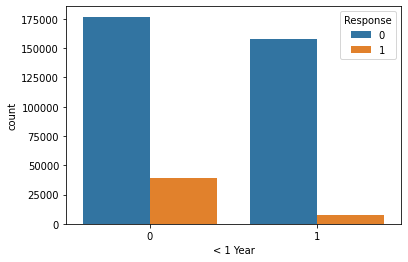

In [90]:
sns.countplot(data['< 1 Year'],hue = data['Response'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


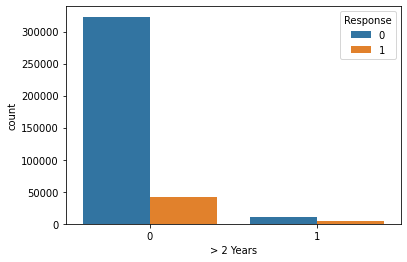

In [91]:
sns.countplot(data['> 2 Years'],hue = data['Response'])

In [92]:
data.drop(['Vehicle_Age', 'Vehicle_Damage', 'Gender'], axis=1, inplace=True)

In [93]:
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M
0,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,1,0,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,1,0,1
2,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,1,0,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,1,0,1
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,1,0


### **Data Normalization**

In [94]:
Annual_Prem = np.array(data['Annual_Premium'])
##Annual_Premium = Annual_Prem-np.mean(Annual_Prem)
##Annual_Premium = (Annual_Premium/np.std(Annual_Premium))
ann_norm = (Annual_Prem-Annual_Prem.min())/(Annual_Prem.max()-Annual_Prem.min())
data.drop(['Annual_Premium'], axis=1, inplace=True)
data['Annual_Premium'] = ann_norm
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium
0,44,1,28.0,0,26.0,217,1,0,0,1,1,0,0,1,0.070366
1,76,1,3.0,0,26.0,183,0,1,0,0,0,1,0,1,0.057496
2,47,1,28.0,0,26.0,27,1,0,0,1,1,0,0,1,0.066347
3,21,1,11.0,1,152.0,203,0,0,1,0,0,1,0,1,0.048348
4,29,1,41.0,1,152.0,39,0,0,1,0,0,1,1,0,0.046259


In [53]:
Reg = np.array(data['Region_Code'])
##Region_Code = Reg-np.mean(Reg)
##Region_Code = (Region_Code/np.std(Region_Code))
reg_norm = (Reg-Reg.min())/(Reg.max()-Reg.min())
data.drop(['Region_Code'], axis=1, inplace=True)
data['Region_Code'] = reg_norm
print(data['Region_Code'].min())
print(data['Region_Code'].max())
data.head()

0.0
1.0


,Age,Driving_License,Previously_Insured,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium,Region_Code
0,44,1,0,26.0,217,1,0,0,1,1,0,0,1,0.070366,0.538462
1,76,1,0,26.0,183,0,1,0,0,0,1,0,1,0.057496,0.057692
2,47,1,0,26.0,27,1,0,0,1,1,0,0,1,0.066347,0.538462
3,21,1,1,152.0,203,0,0,1,0,0,1,0,1,0.048348,0.211538
4,29,1,1,152.0,39,0,0,1,0,0,1,1,0,0.046259,0.788462


In [54]:
print(reg_norm.mean())
print(ann_norm.mean())

0.5074770654145585
0.05196757342583889


In [55]:
Vin = np.array(data['Vintage'])
Vin_norm = (Vin-Vin.min())/(Vin.max()-Vin.min())
data.drop(['Vintage'], axis=1, inplace=True)
data['Vintage'] = Vin_norm
print(data['Vintage'].min())
print(data['Vintage'].max())
print(Vin_norm.mean())
data.head()

0.0
1.0
0.4994719608184822


,Age,Driving_License,Previously_Insured,Policy_Sales_Channel,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium,Region_Code,Vintage
0,44,1,0,26.0,1,0,0,1,1,0,0,1,0.070366,0.538462,0.716263
1,76,1,0,26.0,0,1,0,0,0,1,0,1,0.057496,0.057692,0.598616
2,47,1,0,26.0,1,0,0,1,1,0,0,1,0.066347,0.538462,0.058824
3,21,1,1,152.0,0,0,1,0,0,1,0,1,0.048348,0.211538,0.667820
4,29,1,1,152.0,0,0,1,0,0,1,1,0,0.046259,0.788462,0.100346


In [56]:
psl = np.array(data['Policy_Sales_Channel'])
psl_norm = (psl-psl.min())/(psl.max()-psl.min())
data.drop(['Policy_Sales_Channel'], axis=1, inplace=True)
data['Policy_Sales_Channel'] = psl_norm
print(data['Policy_Sales_Channel'].min())
print(data['Policy_Sales_Channel'].max())
print(psl_norm.mean())
data.head()

0.0
1.0
0.6853968805593319


,Age,Driving_License,Previously_Insured,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium,Region_Code,Vintage,Policy_Sales_Channel
0,44,1,0,1,0,0,1,1,0,0,1,0.070366,0.538462,0.716263,0.154321
1,76,1,0,0,1,0,0,0,1,0,1,0.057496,0.057692,0.598616,0.154321
2,47,1,0,1,0,0,1,1,0,0,1,0.066347,0.538462,0.058824,0.154321
3,21,1,1,0,0,1,0,0,1,0,1,0.048348,0.211538,0.667820,0.932099
4,29,1,1,0,0,1,0,0,1,1,0,0.046259,0.788462,0.100346,0.932099


In [57]:
age = np.array(data['Age'])
age_norm = (age-age.min())/(age.max()-age.min())
data.drop(['Age'], axis=1, inplace=True)
data['Age'] = age_norm
print(data['Age'].min())
print(data['Age'].max())
print(age_norm.mean())
data.head()

0.0
1.0
0.2895782086974108


,Driving_License,Previously_Insured,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium,Region_Code,Vintage,Policy_Sales_Channel,Age
0,1,0,1,0,0,1,1,0,0,1,0.070366,0.538462,0.716263,0.154321,0.369231
1,1,0,0,1,0,0,0,1,0,1,0.057496,0.057692,0.598616,0.154321,0.861538
2,1,0,1,0,0,1,1,0,0,1,0.066347,0.538462,0.058824,0.154321,0.415385
3,1,1,0,0,1,0,0,1,0,1,0.048348,0.211538,0.667820,0.932099,0.015385
4,1,1,0,0,1,0,0,1,1,0,0.046259,0.788462,0.100346,0.932099,0.138462


### **Correlation matrix**

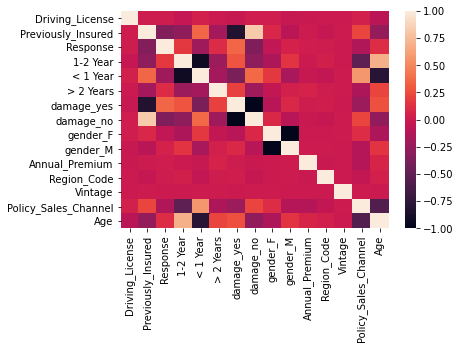

In [58]:
sns.heatmap(data.corr())

In [59]:
data.corr()

,Driving_License,Previously_Insured,Response,1-2 Year,< 1 Year,> 2 Years,damage_yes,damage_no,gender_F,gender_M,Annual_Premium,Region_Code,Vintage,Policy_Sales_Channel,Age
Driving_License,1.000000,0.014969,0.010155,-0.037403,0.040215,-0.006211,-0.016622,0.016622,0.018374,-0.018374,-0.011906,-0.001081,-0.000848,0.043731,-0.079782
Previously_Insured,0.014969,1.000000,-0.341170,-0.279077,0.358773,-0.191352,-0.824143,0.824143,0.081932,-0.081932,0.004269,-0.024659,0.002537,0.219381,-0.254682
Response,0.010155,-0.341170,1.000000,0.164317,-0.209878,0.109300,0.354400,-0.354400,-0.052440,0.052440,0.022575,0.010570,-0.001050,-0.139042,0.111147
1-2 Year,-0.037403,-0.279077,0.164317,1.000000,-0.918704,-0.220402,0.284717,-0.284717,-0.147633,0.147633,-0.002495,0.038055,-0.002632,-0.508265,0.692910
< 1 Year,0.040215,0.358773,-0.209878,-0.918704,1.000000,-0.182750,-0.370778,0.370778,0.166280,-0.166280,-0.022555,-0.044250,0.002410,0.571516,-0.787775
> 2 Years,-0.006211,-0.191352,0.109300,-0.220402,-0.182750,1.000000,0.206961,-0.206961,-0.043155,0.043155,0.061918,0.014555,0.000600,-0.146238,0.220694
damage_yes,-0.016622,-0.824143,0.354400,0.284717,-0.370778,0.206961,1.000000,-1.000000,-0.091606,0.091606,0.009349,0.028235,-0.002064,-0.224377,0.267534
damage_no,0.016622,0.824143,-0.354400,-0.284717,0.370778,-0.206961,-1.000000,1.000000,0.091606,-0.091606,-0.009349,-0.028235,0.002064,0.224377,-0.267534
gender_F,0.018374,0.081932,-0.052440,-0.147633,0.166280,-0.043155,-0.091606,0.091606,1.000000,-1.000000,-0.003673,-0.000604,0.002517,0.111159,-0.145545
gender_M,-0.018374,-0.081932,0.052440,0.147633,-0.166280,0.043155,0.091606,-0.091606,-1.000000,1.000000,0.003673,0.000604,-0.002517,-0.111159,0.145545


## **Data Visulization**

### **Observations for Gender:**
1. From the above plot, we can derive that the male and female customers who don't have previously insured are more likely to buy
vehicle insurance.
2. The count of male customers is greater than the female customers
who are likely to buy vehicle insurance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


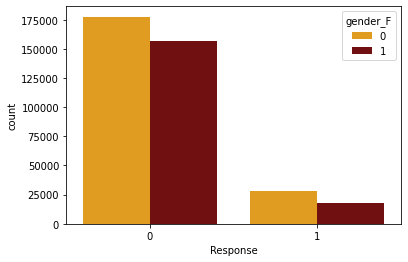

In [24]:
sns.countplot(data['Response'],hue = data['gender_F'],palette=['Orange','Maroon'])
plt.savefig('test.png')

### **Observations for Age:**
1. In almost every age group, 'Male's are more likely to buy insurance.
2. Females under age 30 are very less likely to buy insurance
3. Costumes of age between 20 to 30 are more likely to buy insurance.
4. Customers of age between 30 to 60 are less likely to buy insurance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


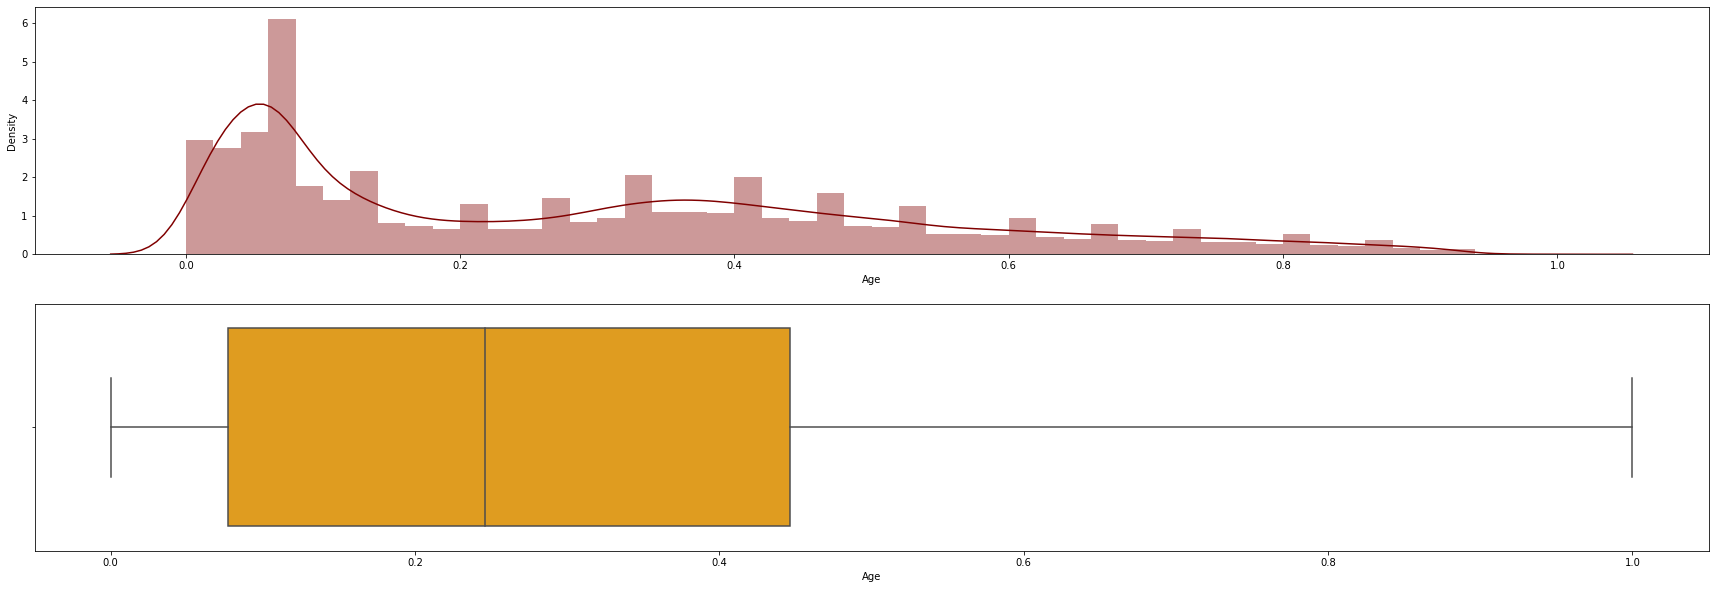

In [60]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,10))
axx = ax.flatten()
#plt.figure(figsize=(30,10))
sns.distplot(data['Age'],ax=axx[0], color='Maroon')
plt.savefig('test1.png')
sns.boxplot(data['Age'],ax=axx[1],color='Orange')
plt.savefig('test2.png')

### **Observations for Policy Sales Channel:**

1. Clearly there are no outliers for response = 0 as well as response = 1
2. Also from bar plot, we can say that there are only few points are added to more than 95% of all policy sales channel. 

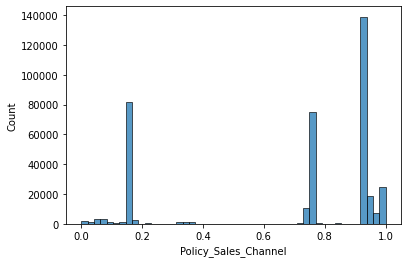

In [29]:
sns.histplot(data.Policy_Sales_Channel) #only five values are above 10,000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


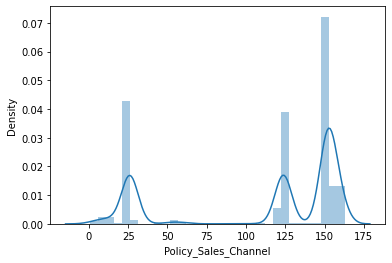

In [ ]:
sns.distplot(data.Policy_Sales_Channel)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


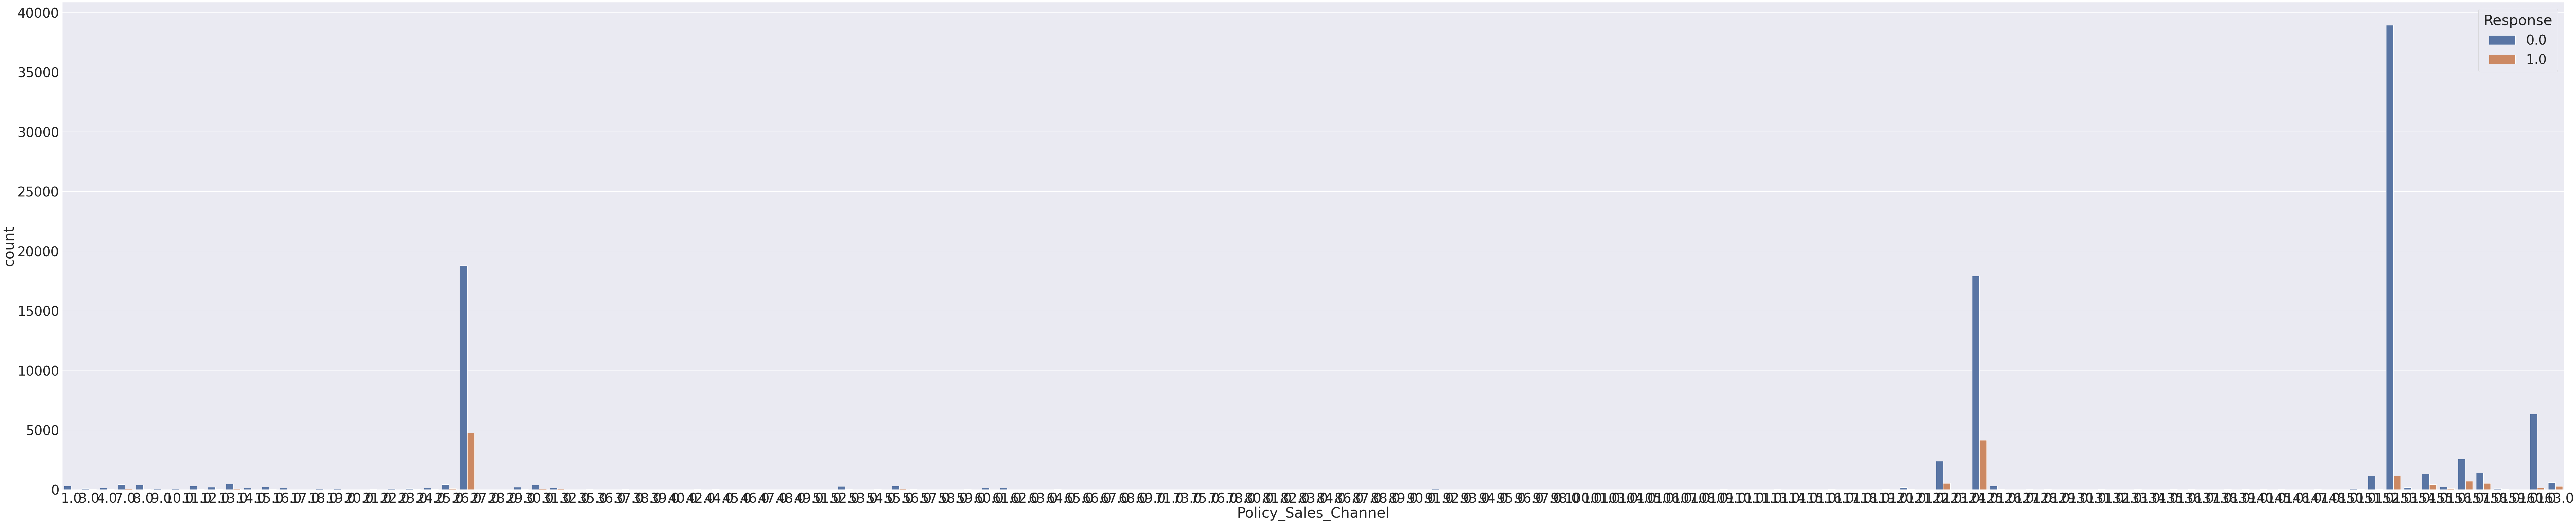

In [ ]:
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(150, 30))
sns.countplot(data.Policy_Sales_Channel, hue=data.Response, ax=ax)

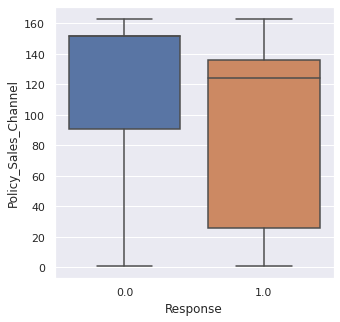

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y = data.Policy_Sales_Channel, x = data.Response)

### **Observations for Vintage:**

1. Clearly there are no outliers for response = 0 as well as response = 1
2. Also from bar plot, we can say that there is nearly uniform distribution for both Response = 0 as well as Response = 1  

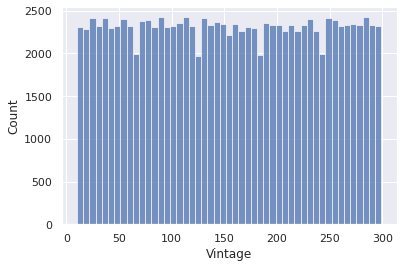

In [ ]:
sns.histplot(data.Vintage)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


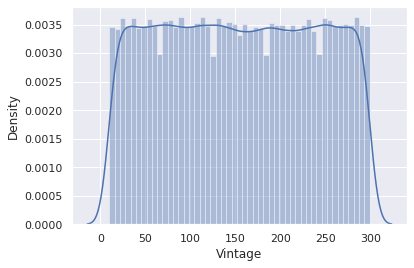

In [ ]:
sns.distplot(data.Vintage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


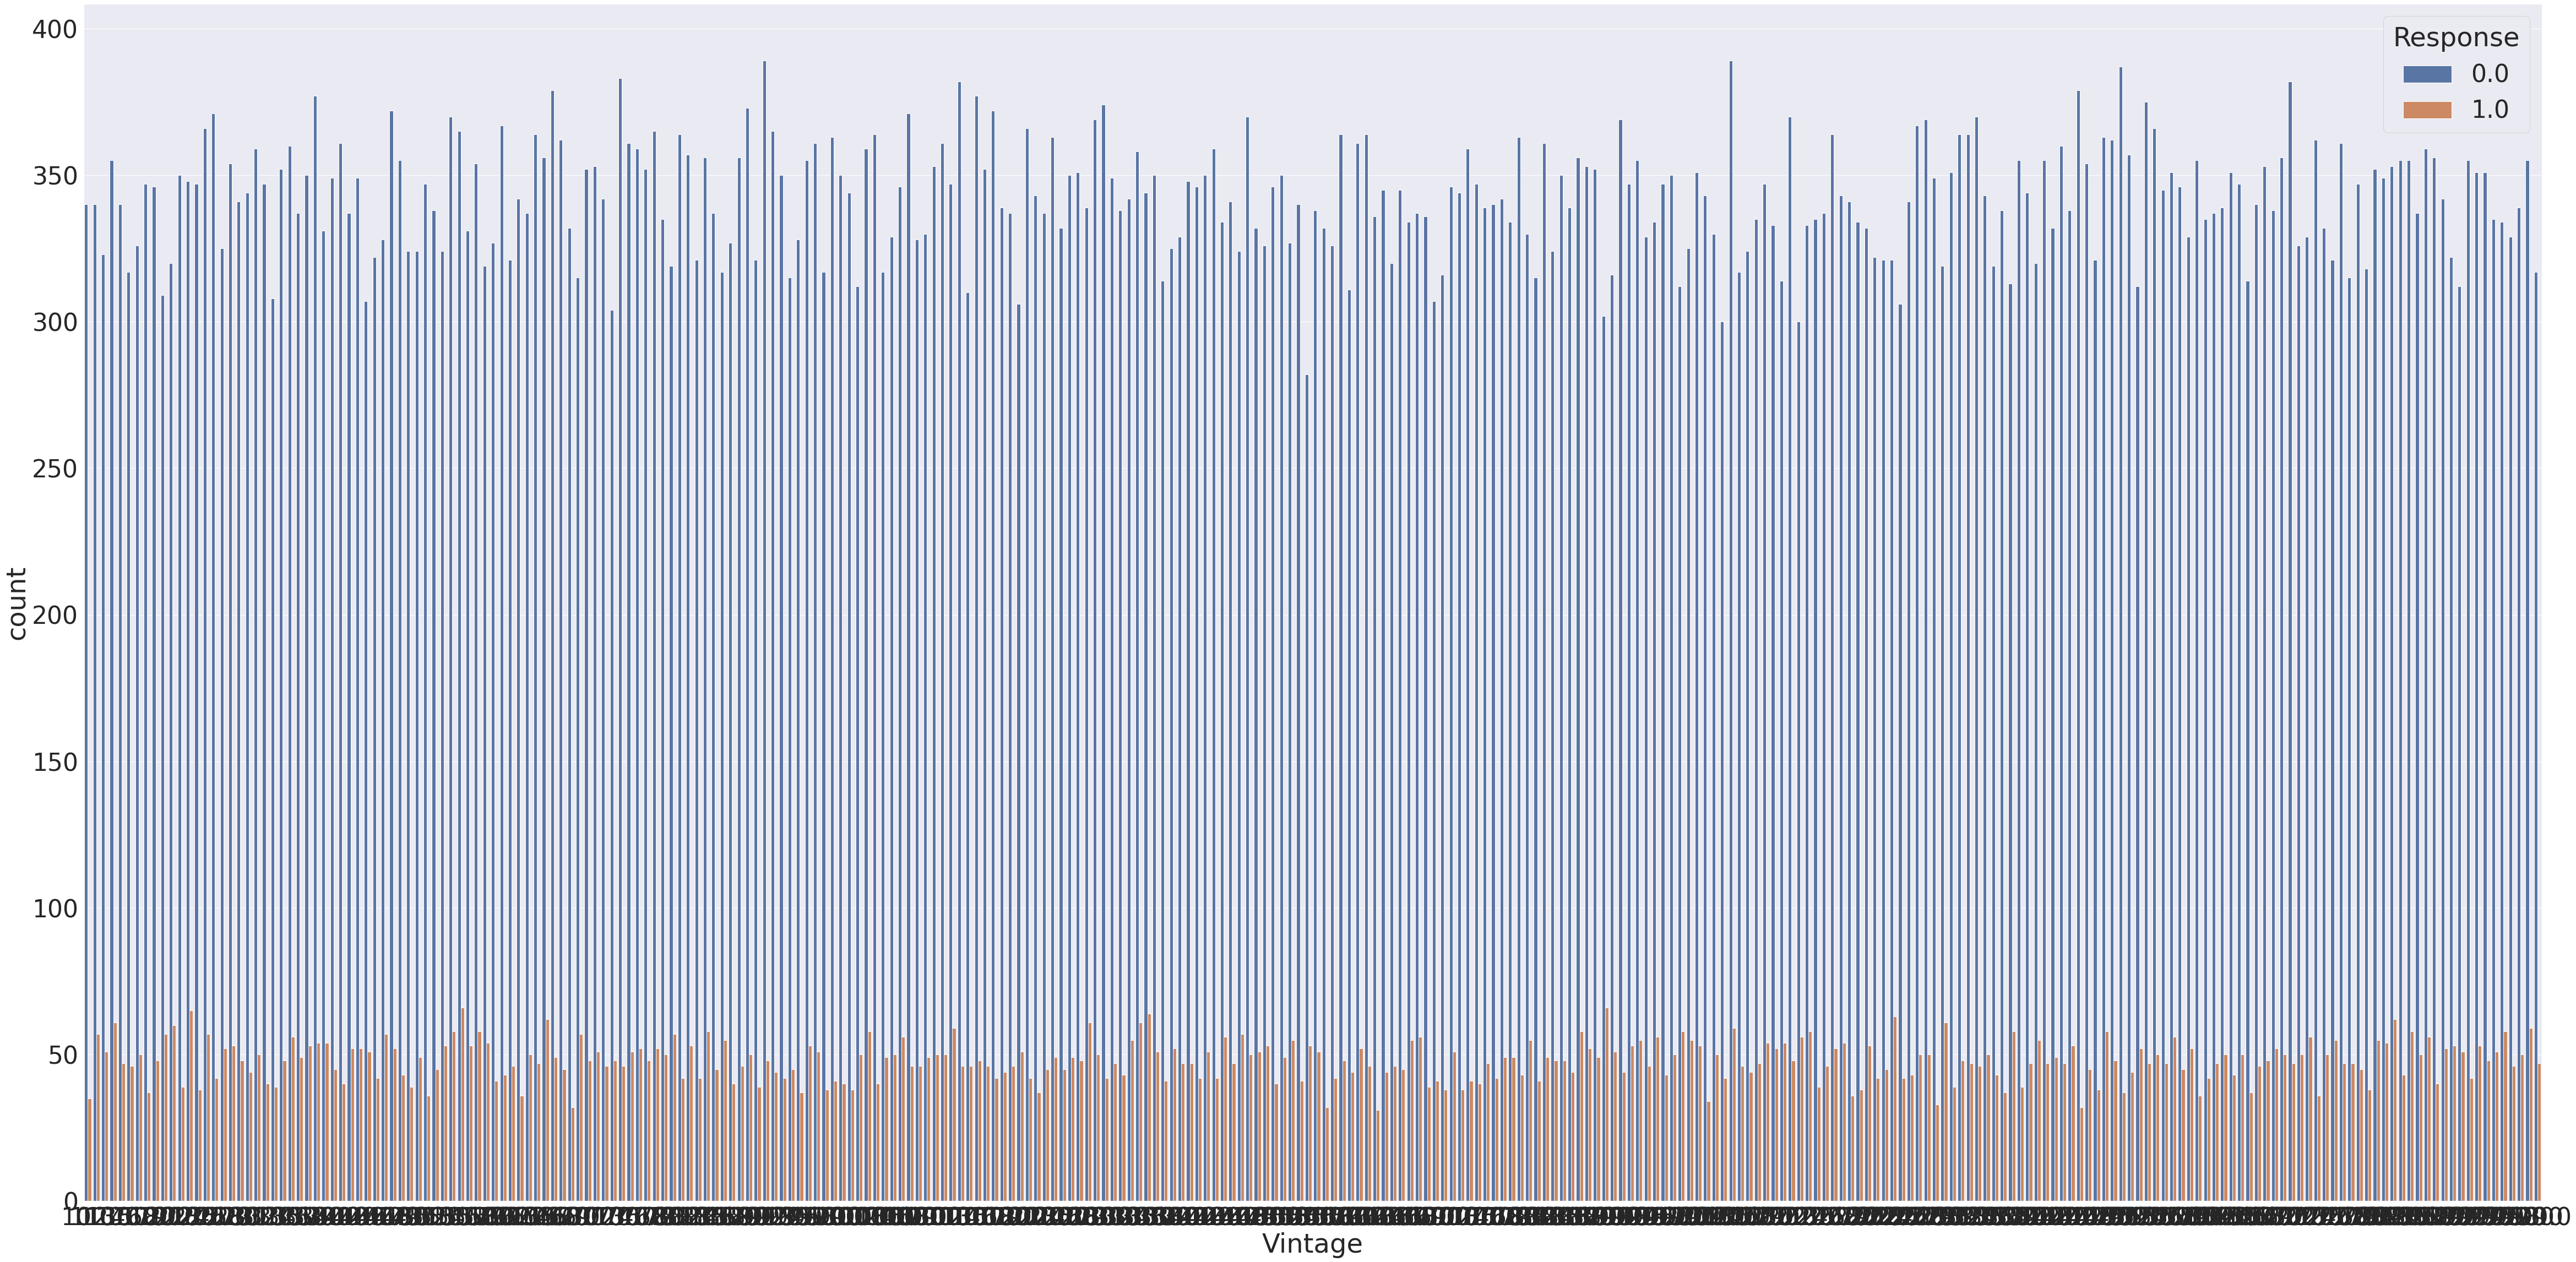

In [ ]:
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(80, 40))
sns.countplot(data.Vintage, hue=data.Response, ax=ax)

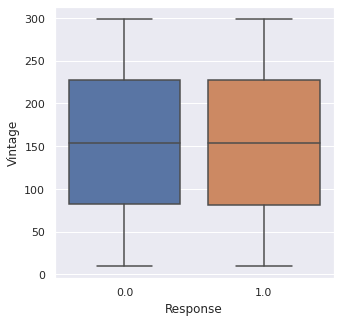

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y = data.Vintage, x = data.Response)

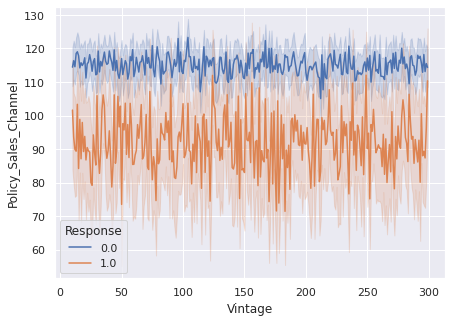

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(x=data.Vintage, y=data.Policy_Sales_Channel, hue=data.Response)

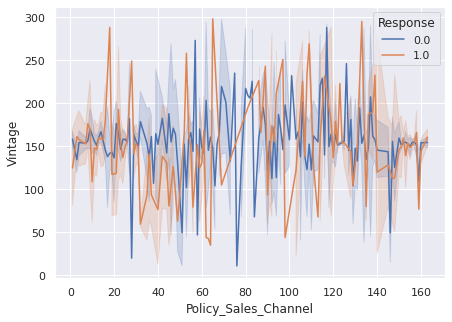

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(x=data.Policy_Sales_Channel, y=data.Vintage, hue=data.Response)

### **Observations for Region Code:**

1. As observed in the plot, most of the positive response of the
customer has come from region code = 28.0.
2. Rest of the region codes have few positive responses from the
customer. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


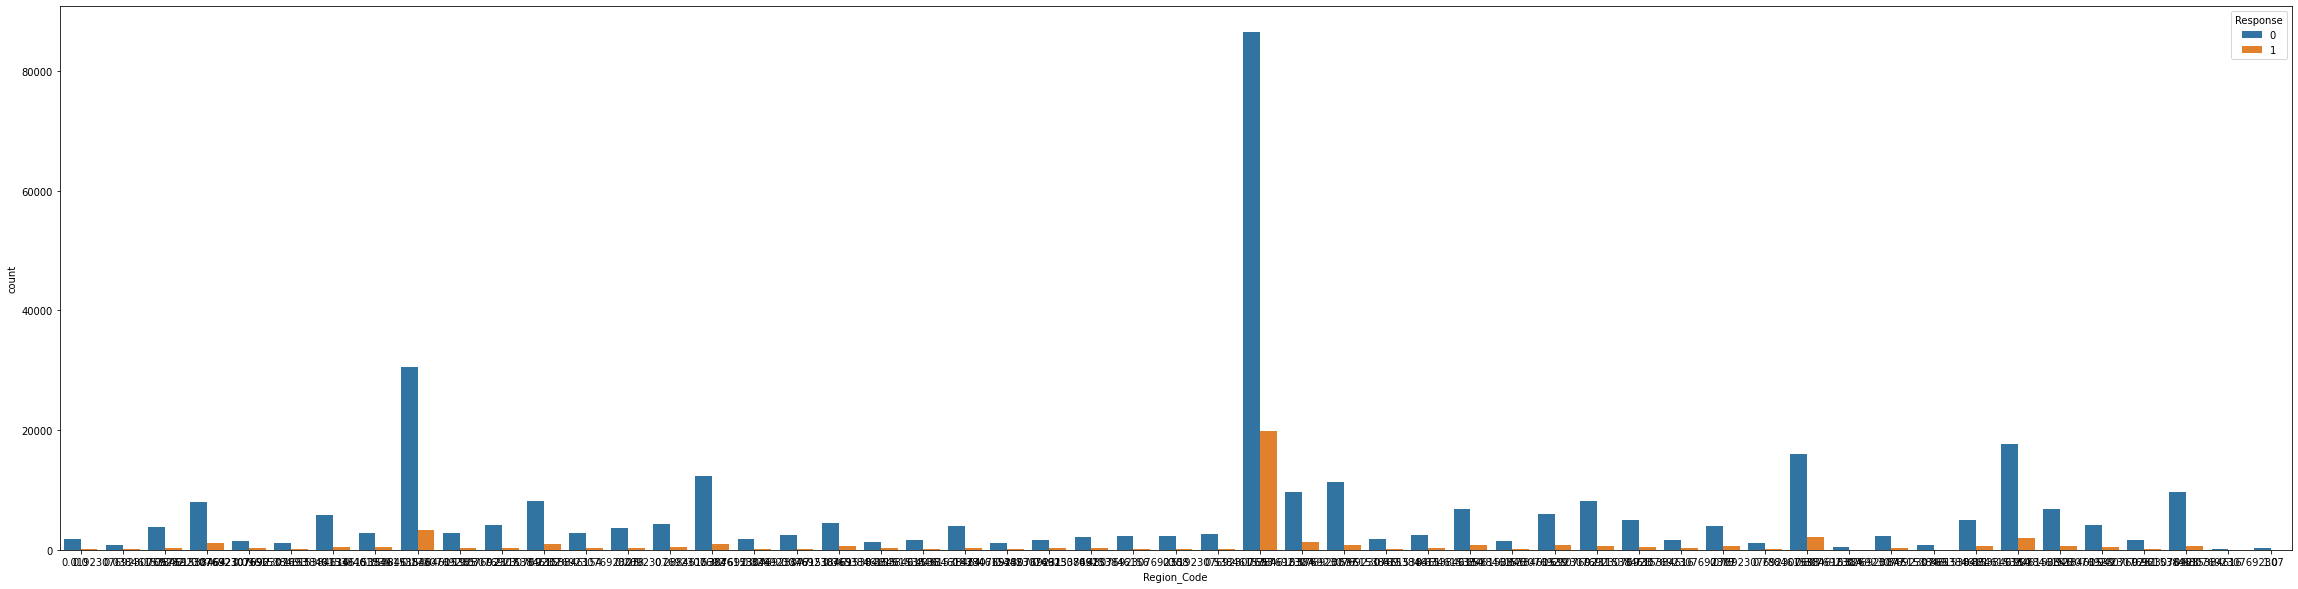

In [30]:
plt.figure(figsize = (40,10))
sns.countplot(data['Region_Code'], hue = data['Response'])

### **Observations for Previously Insured:**

1. As shown in the above plot, only customers which had positive
responses towards the insurance were the customers which did not
have insurance previously.
2. Customers which already have vehicle insurance are not interested in
buying the new insurance from our company.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


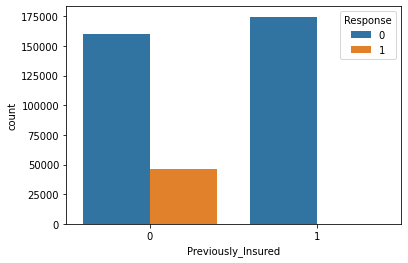

In [31]:
sns.countplot(data['Previously_Insured'],hue = data['Response'])

### **Observations for Vehicle Damage:**

1. Customers without vehicle damage are less than 1% likely to buy insurance.
2. The number of customers with vehicle damage and without damage are
equal.
3. Customers with vehicle damage are comparatively more likely to buy the
insurance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


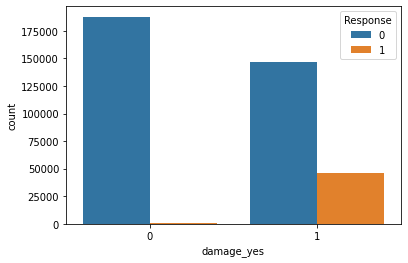

In [66]:
sns.countplot(data['damage_yes'],hue = data['Response'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


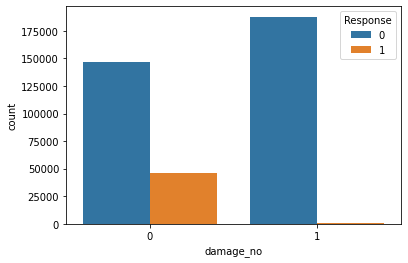

In [67]:
sns.countplot(data['damage_no'],hue = data['Response'])

### **Observations for Annual Premium:**

1. The data is highly left skewed.
2. The annual premium for most of the customers is in the range of (0,10000)
and (20000,50000).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


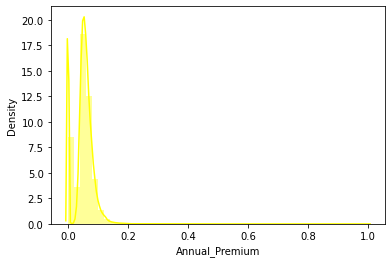

In [68]:
sns.distplot(data['Annual_Premium'], color='Yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


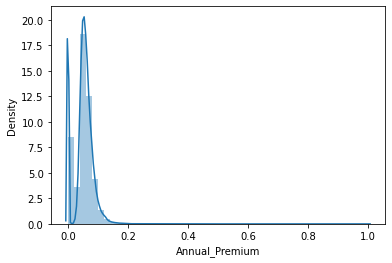

In [69]:
sns.distplot(data[ data['Annual_Premium'] < 100000]['Annual_Premium'])

# **Model Creation**

## **Logistic Regression**

In [ ]:
#X = np.array(data.drop(['Response'], axis=1))
#y = np.array(data['Response'])
#print(X.shape)
#print(y.shape)

(380840, 14)
(380840,)


In [95]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [96]:
arr =  np.array(data)

In [97]:
array = []
for i in range(arr.shape[0]):
  if arr[i,2] == 1:
    array.append(arr[i,:])

In [98]:
for i in range(0,(arr.shape[0]-250000)):
  if arr[i,2] == 0:
    array.append(arr[i,:])

In [99]:
final_arr = np.array(array)
final_arr.shape

(1693, 15)

In [100]:
y = final_arr[:,2]
X = np.delete(final_arr, 2, axis=1)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print('X_train: ',X_train.shape,'y_train: ',y_train.shape,'X_test: ',X_test.shape,'y_test: ',y_test.shape)

X_train:  (1185, 14) y_train:  (1185,) X_test:  (508, 14) y_test:  (508,)


In [109]:
from sklearn import metrics

In [132]:
model = LogisticRegression(solver='saga', penalty='l1', C=0.5, class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
probabilities = model.predict_proba(X_test)
print(probabilities)

[[0.360549   0.639451  ]
 [0.60290154 0.39709846]
 [0.62118226 0.37881774]
 ...
 [0.65047706 0.34952294]
 [0.42870353 0.57129647]
 [0.64220364 0.35779636]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [147]:
print('Probabilities for top 10 examples',probabilities[0:10])

Probabilities for top 10 examples [[0.360549   0.639451  ]
 [0.60290154 0.39709846]
 [0.62118226 0.37881774]
 [0.42454723 0.57545277]
 [0.67909836 0.32090164]
 [0.38422217 0.61577783]
 [0.634345   0.365655  ]
 [0.27544584 0.72455416]
 [0.72728242 0.27271758]
 [0.46672544 0.53327456]]


In [133]:
print(y_test)

[1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.

In [134]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, pred))

Confusion Matrix:  [[120  88]
 [109 191]]


In [135]:
acc_score = metrics.accuracy_score(y_test, pred)
print('Accuracy Score: ', acc_score)
precision_score = metrics.precision_score(y_test, pred)
print('Precision Score: ', precision_score)
recall_score = metrics.recall_score(y_test, pred)
print('Recall Score: ', recall_score)

Accuracy Score:  0.6122047244094488
Precision Score:  0.6845878136200717
Recall Score:  0.6366666666666667


In [159]:
model1 = LogisticRegression(solver='saga', penalty='l2', C=0.5, class_weight='balanced')
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
probabilities1 = model1.predict_proba(X_test)
print(probabilities1)

[[0.36066223 0.63933777]
 [0.60073799 0.39926201]
 [0.62144253 0.37855747]
 ...
 [0.65256283 0.34743717]
 [0.42936594 0.57063406]
 [0.64109095 0.35890905]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [160]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, pred1))

Confusion Matrix:  [[119  89]
 [109 191]]


In [161]:
acc_score = metrics.accuracy_score(y_test, pred1)
print('Accuracy Score: ', acc_score)
precision_score = metrics.precision_score(y_test, pred1)
print('Precision Score: ', precision_score)
recall_score = metrics.recall_score(y_test, pred1)
print('Recall Score: ', recall_score)

Accuracy Score:  0.610236220472441
Precision Score:  0.6821428571428572
Recall Score:  0.6366666666666667


In [162]:
model2 = LogisticRegression(solver='saga', penalty='l2', C=0.1, class_weight='balanced')
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
probabilities2 = model2.predict_proba(X_test)
print(probabilities2)

[[0.3605641  0.6394359 ]
 [0.60074594 0.39925406]
 [0.6213414  0.3786586 ]
 ...
 [0.65244964 0.34755036]
 [0.4292949  0.5707051 ]
 [0.64118233 0.35881767]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [163]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, pred2))

Confusion Matrix:  [[119  89]
 [109 191]]


In [164]:
acc_score = metrics.accuracy_score(y_test, pred2)
print('Accuracy Score: ', acc_score)
precision_score = metrics.precision_score(y_test, pred2)
print('Precision Score: ', precision_score)
recall_score = metrics.recall_score(y_test, pred2)
print('Recall Score: ', recall_score)

Accuracy Score:  0.610236220472441
Precision Score:  0.6821428571428572
Recall Score:  0.6366666666666667


In [165]:
model3 = LogisticRegression(solver='saga', penalty='l1', C=0.1, class_weight='balanced')
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
probabilities3 = model3.predict_proba(X_test)
print(probabilities3)

[[0.36206692 0.63793308]
 [0.60962526 0.39037474]
 [0.62121881 0.37878119]
 ...
 [0.64308711 0.35691289]
 [0.42448285 0.57551715]
 [0.6469745  0.3530255 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [166]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, pred3))

Confusion Matrix:  [[122  86]
 [108 192]]


In [167]:
acc_score = metrics.accuracy_score(y_test, pred3)
print('Accuracy Score: ', acc_score)
precision_score = metrics.precision_score(y_test, pred3)
print('Precision Score: ', precision_score)
recall_score = metrics.recall_score(y_test, pred3)
print('Recall Score: ', recall_score)

Accuracy Score:  0.6181102362204725
Precision Score:  0.6906474820143885
Recall Score:  0.64


In [168]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

In [ ]:
import matplotlib.pyplot as plt

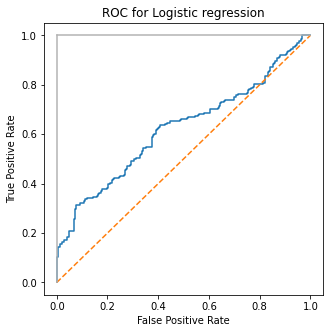

In [139]:
plt.subplots(1, figsize=(5,5))
plt.title('ROC for Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic Regression from scratch**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(data.drop(['Response'], axis=1))
y = np.array(data['Response'])
print(X.shape)
print(y.shape)

(381109, 14)
(381109,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266776, 14)
(266776,)
(114333, 14)
(114333,)


In [102]:
def train_Logistic_Regression(X_train, y_train, learning_rate):
  theta = np.zeros(X_train.shape[1])
  bias = 0
  epochs = 500
  for i in range(epochs):
    model = np.dot(X_train, theta) + bias ## Calculating a + bx where b are our parameters and a is bias.
    y_pred = Sigmoid_LR(model) ## After getting hypothesis we will pass it through sigmoid function
    derivative_bias = (1/X_train.shape[1])+ np.sum(y_pred-y_train) ## After we got predicted values which is between 0-1, we will look for derivative of bias
    derivative_theta = (1/X_train.shape[1])+ np.dot(X_train.T, (y_pred-y_train)) ## Calculation of theta derivative by formula of (X*loss)
    
    bias = bias - learning_rate * derivative_bias ## adjusting bias to get less error
    theta = theta - learning_rate * derivative_theta ## Decreasing loss and adjusting theta according to X
  return model, bias, theta, y_pred 

In [103]:
def Sigmoid_LR(a):
  return 1/(1-np.exp(-a))

In [104]:
def Prediction_LR(y_pred):
  prediction = [1 if i>0.5 else 0 for i in y_pred]
  return prediction

In [105]:
learning_rate = 0.001
model, bias, theta, y_pred = train_Logistic_Regression(X_train, y_train, learning_rate)
prediction = Prediction_LR(y_pred)
accuracy = (1/X_train.shape[0])*np.sum(prediction==y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [106]:
print(accuracy)

0.40337552742616034


In [107]:
test_model = Sigmoid_LR(np.dot(X_test, theta))
test_pred = Prediction_LR(test_model)
accuracy = (1/X_test.shape[0])*np.sum(y_test==test_pred)
print('Validation Accuracy: ', accuracy)

Validation Accuracy:  0.4074803149606299


## **SVM using sklearn**

In [113]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [114]:
arr =  np.array(data)

In [115]:
array = []
for i in range(arr.shape[0]):
  if arr[i,2] == 1:
    array.append(arr[i,:])

In [116]:
for i in range(0,(arr.shape[0]-250000)):
  if arr[i,2] == 0:
    array.append(arr[i,:])

In [117]:
final_arr = np.array(array)
final_arr.shape

(1693, 15)

In [118]:
y = final_arr[:,2]
X = np.delete(final_arr, 2, axis=1)

In [119]:
print(y.shape)
print(X.shape)

(1693,)
(1693, 14)


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (1185, 14)
y_train:  (1185,)
X_test:  (508, 14)
y_test:  (508,)


In [121]:
from sklearn.svm import SVC

In [122]:
model_SVC = SVC(C=0.1, kernel='linear', probability=True) ###panelty is predefined as l2
model_SVC.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [123]:
y_predicted_SVC = model_SVC.predict(X_test)

In [124]:
import sklearn.metrics as metrics

In [125]:
prob = model_SVC.predict_proba(X_test)
acc = metrics.accuracy_score(y_test, y_predicted_SVC)
print('Accuracy Score: ', acc)
print('Probabilities: ', prob)

Accuracy Score:  0.6161417322834646
Probabilities:  [[0.23919571 0.76080429]
 [0.49439089 0.50560911]
 [0.57583511 0.42416489]
 ...
 [0.57361596 0.42638404]
 [0.32221261 0.67778739]
 [0.54101214 0.45898786]]


In [146]:
print('Probabilities of top 10 examples: ', prob[0:10])

Probabilities of top 10 examples:  [[0.23919571 0.76080429]
 [0.49439089 0.50560911]
 [0.57583511 0.42416489]
 [0.30052577 0.69947423]
 [0.54878384 0.45121616]
 [0.22529299 0.77470701]
 [0.57941205 0.42058795]
 [0.27053362 0.72946638]
 [0.53189006 0.46810994]
 [0.28756676 0.71243324]]


In [126]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_predicted_SVC))

Confusion Matrix:  [[115  93]
 [102 198]]


In [127]:
acc_score = metrics.accuracy_score(y_test, y_predicted_SVC)
print('Accuracy Score: ', acc_score)
precision_score = metrics.precision_score(y_test, y_predicted_SVC)
print('Precision Score: ', precision_score)
recall_score = metrics.recall_score(y_test, y_predicted_SVC)
print('Recall Score: ', recall_score)

Accuracy Score:  0.6161417322834646
Precision Score:  0.6804123711340206
Recall Score:  0.66


In [ ]:
model_SVC1 = SVC(C=0.1, kernel='poly', probability=False) ###panelty is predefined as l2
model_SVC1.fit(X_train, y_train)
y_predicted_SVC1 = model_SVC1.predict(X_test)

In [ ]:
#prob = model_SVC.predict_proba(X_test)
acc = metrics.accuracy_score(y_test, y_predicted_SVC1)
print('Accuracy Score: ', acc)
#print('Probabilities: ', prob)

Accuracy Score:  0.7577986566118597


In [ ]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_predicted_SVC1))

Confusion Matrix:  [[26330  8185]
 [ 3570 10449]]


In [ ]:
model_SVC2 = SVC(C=0.1, kernel='rbf', probability=False) ###panelty is predefined as l2
model_SVC2.fit(X_train, y_train)
y_predicted_SVC2 = model_SVC2.predict(X_test)

In [ ]:
#prob = model_SVC.predict_proba(X_test)
acc = metrics.accuracy_score(y_test, y_predicted_SVC2)
print('Accuracy Score: ', acc)
#print('Probabilities: ', prob)

Accuracy Score:  0.7577986566118597


In [ ]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_predicted_SVC2))

Confusion Matrix:  [[26514  8001]
 [ 3754 10265]]


In [ ]:
model_SVC3 = SVC(C=0.5, kernel='linear', probability=False) ###panelty is predefined as l2
model_SVC3.fit(X_train, y_train)
y_predicted_SVC3 = model_SVC3.predict(X_test)

In [ ]:
#prob = model_SVC.predict_proba(X_test)
acc = metrics.accuracy_score(y_test, y_predicted_SVC3)
print('Accuracy Score: ', acc)
#print('Probabilities: ', prob)

Accuracy Score:  0.7586640293402563


In [ ]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_predicted_SVC3))

Confusion Matrix:  [[26819  7696]
 [ 4017 10002]]


In [ ]:
model_SVC4 = SVC(C=1, kernel='linear', probability=False) ###panelty is predefined as l2
model_SVC4.fit(X_train, y_train)
y_predicted_SVC4 = model_SVC4.predict(X_test)

In [ ]:
#prob = model_SVC.predict_proba(X_test)
acc = metrics.accuracy_score(y_test, y_predicted_SVC4)
print('Accuracy Score: ', acc)
#print('Probabilities: ', prob)

Accuracy Score:  0.7586846334528372


In [ ]:
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_predicted_SVC4))

Confusion Matrix:  [[26827  7688]
 [ 4024  9995]]


In [130]:
from sklearn.metrics import roc_curve
#fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, prob[:,1])

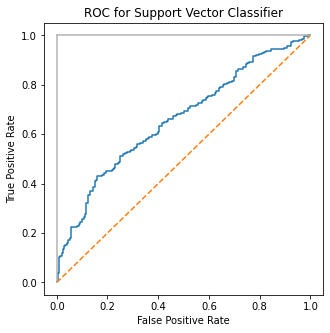

In [140]:
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, prob[:,1])
plt.subplots(1, figsize=(5,5))
plt.title('ROC for Support Vector Classifier')
plt.plot(fpr_SVC, tpr_SVC)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()